# <a> Regressão </a> 

Os desafios associados à análise de **regressão** demonstram-se como sendo problemas significativos no cotidiano de diversas empresas. Prever o faturamento mensal ou antecipar a demanda por produtos específicos são apenas dois exemplos notáveis da relevância de abordar eficazmente essas questões em um ambiente empresarial. Dentro dessa perspectiva, resolver o primeiro cenário pode dotar a empresa com a capacidade de realizar planejamentos financeiros sólidos, ao passo que superar o segundo desafio pode assegurar uma alocação precisa e eficaz dos recursos disponíveis para a organização.

Nesse sentido, esses dois cenários podem ser conceituados como **problemas de regressão**, já que a tarefa principal é a previsão de uma variável **contínua**, ou seja, uma variável numérica que possui um número infinito de valores entre quaisquer dois valores. 

# <a> Visão Geral - Modelagem Preditiva para Seguros </a>

O presente projeto apresenta uma base de dados contendo informações acerca de planos de saúde. Este trabalho tem sua utilidade decorrente do fato de que, para consolidar sua **lucratividade**, é necessário que uma seguradora de saúde arrecade mais prêmios do que gasta com seus segurados. Nesse sentido, há uma demanda pela construção de modelos de *Machine Learning* com capacidade de realizar predições acuradas acerca dos gastos médicos que cada beneficiário pode apresentar. 

A base de dados utilizada é apresentada no livro ["Machine Learning with R"](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-r) de Brett Lantz, disponível [aqui](https://github.com/stedy/Machine-Learning-with-R-datasets).

# <a> Objetivo </a>

O objetivo deste projeto é construir um modelo de *Machine Learning* que seja capaz de resolver o problema de regressão relacionado à **previsão dos gastos de saúde que um segurado pode apresentar**, tendo como base suas características.

## <a> Bibliotecas e Configurações </a> 

In [1]:
# Importando bibliotecas necessárias
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import warnings

# Configurando Pandas para mostrar todas as linhas e colunas
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Configurando Pandas para não mostrar notação científica 
pd.set_option("display.float_format", lambda x: '%.2f' % x)

# Ignorando Warnings
warnings.filterwarnings('ignore')

## <a> Dados </a>

In [2]:
# Lendo base de dados
df_seguro = pd.read_csv("./data/insurance.csv")

# Visualizando 5 primeiras linhas 
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


## <a> Dicionário de Dados </a>



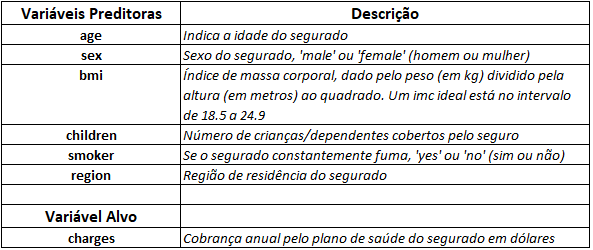

In [3]:
# Renomeando colunas
novos_nomes = {'age': 'idade', 'sex': 'sexo', 'bmi': 'imc', 'children': 'crianças',
                      'smoker': 'fumante', 'region': 'regiao', 'charges': 'cobrancas'}

# Aplicando 
df_seguro.rename(columns=novos_nomes, inplace = True)

# Vendo novo DataFrame
df_seguro.head()

,idade,sexo,imc,crianças,fumante,regiao,cobrancas
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [4]:
# Visualizando as dimensões do gráfico
df_seguro.shape

(1338, 7)

In [5]:
# Visualizando os tipos de dados
df_seguro.dtypes

idade          int64
sexo          object
imc          float64
crianças       int64
fumante       object
regiao        object
cobrancas    float64
dtype: object

* Vamos precisar tratar algumas variáveis categóricas para poder utilizá-las nos algoritmos.
* A variável alvo 'cobrancas' tem o tipo float64, o que indica que esta é uma feature contínua, objeto de previsão num problema de regressão

In [6]:
# Visualizando algumas informações do DataFrame
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      1338 non-null   int64  
 1   sexo       1338 non-null   object 
 2   imc        1338 non-null   float64
 3   crianças   1338 non-null   int64  
 4   fumante    1338 non-null   object 
 5   regiao     1338 non-null   object 
 6   cobrancas  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## <a> Análise Exploratória de Dados </a>

Como etapa fundamental de qualquer projeto de Data Science, a análise exploratória além de possibilitar um maior conhecimento dos dados, nos fornece bons indicativos de quais são os melhores modelos a se utilizar para resolver o problema em questão. Nesse sentido, iremos analisar distribuições, medidas de tendência central, separatrizes, frequência e correlação entre as variáveis. 

In [7]:
# Analisando separatrizes e medidas de tendência central
df_seguro.describe()

,idade,imc,crianças,cobrancas
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [8]:
# Verificando a moda da variável IMC
df_seguro['imc'].mode()

0   32.30
Name: imc, dtype: float64

## <a> Médias</a>
A **Média** das idades é pouco mais de **39 anos**

A **Média** de crianças/dependentes é igual a **1,09**

A **Média** das cobranças é igual a **13.270,42 dólares** anuais

## <a> Valores mínimos </a>
A **menor** idade é **18 anos**

A **menor** cobrança pelo seguro é de **1.121,87 dólares** anuais

## <a> 1º Quartil </a>
Apenas **25%** dos segurados têm **menos de 27 anos** 

Apenas **25%** das pessoas pagam **menos de 4.740,29 dólares**, anualmente, pelo seguro

## <a> 3º Quartil </a>
Apenas **25%** dos segurados têm **mais de 51 anos**

Apenas **25%** dos segurados pagam **mais de 16.639,91 dólares**, anualmente, pelo seguro

## <a> Valores máximos </a>
A **maior** idade é **64 anos**

O **maior** gasto, anualmente, corresponde a **63.70,43 dólares**

## <a> Distribuição </a>
A variável **IMC** aparenta ter uma **distribuição normal**, em razão de sua **simetria** (média e mediana são próximas). No entanto, sua moda é um pouco diferente desses valores. Sendo assim, é necessário analisar a distribuição por meio de um histograma

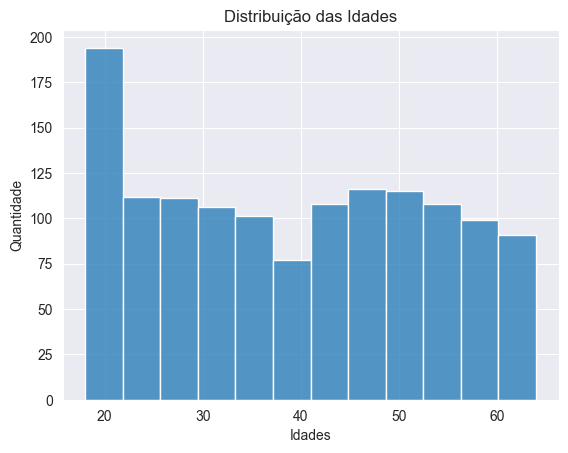

In [9]:
# Analisando a distribuição das idades
sns.set_style("darkgrid")
plt.tight_layout()
sns.histplot(data = df_seguro, x = 'idade')

# Colocando legendas e mostrando
plt.title("Distribuição das Idades")
plt.xlabel("Idades")
plt.ylabel("Quantidade")
plt.show()

* #### Desconsiderando a alta concentração de idades na faixa de 18 a 22 anos, a distribuição destas aparenta ser uniforme.

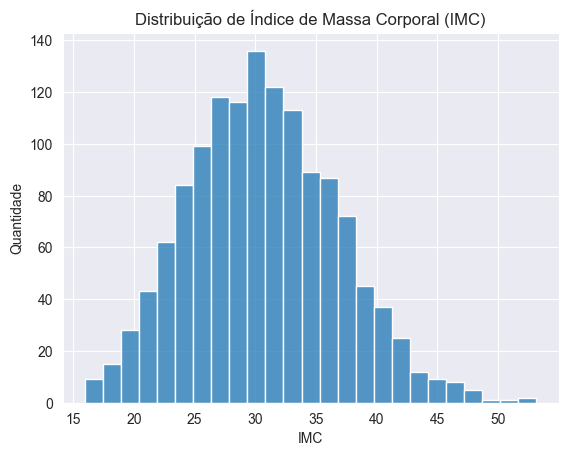

In [10]:
# Analisando a distribuição de IMC
sns.set_style("darkgrid")
plt.tight_layout()
sns.histplot(data = df_seguro, x = 'imc')

# Colocando título e mostrando
plt.title("Distribuição de Índice de Massa Corporal (IMC)")
plt.xlabel("IMC")
plt.ylabel("Quantidade")
plt.show()

* #### Como é possível observar, embora a variável IMC não siga estritamente uma distribuição normal, sua utilização em modelos lineares pode ser bem interessante, tendo em vista que tais modelos se comportam bem com variáveis normais.

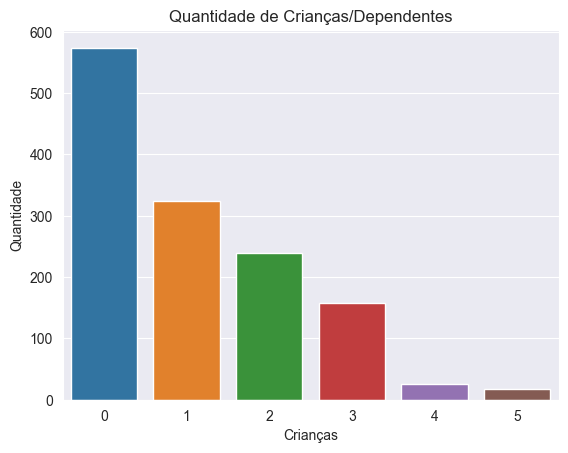

In [11]:
# Analisando a quantidade de crianças/dependentes
sns.set_style("darkgrid")
plt.tight_layout()
sns.countplot(data = df_seguro, x = 'crianças')

# Colocando legendas e mostrando
plt.title("Quantidade de Crianças/Dependentes")
plt.xlabel("Crianças")
plt.ylabel("Quantidade")
plt.show()

* #### O valor mais frequente(moda) para o número de crianças é 0, o que pode ser reflexo da alta concentração de jovens.

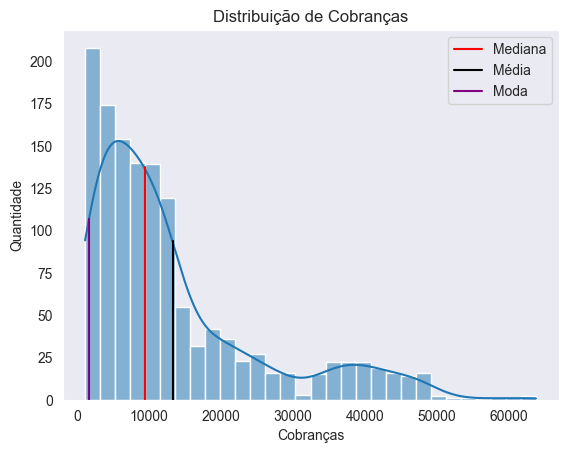

In [12]:
# Analisando a distribuição dos valores anuais do seguro
sns.set_style("dark")
plt.tight_layout()
sns.histplot(data = df_seguro, x = 'cobrancas', kde = True)
plt.axvline(x=df_seguro['cobrancas'].median(), color='red', linestyle='solid', label='Mediana', ymax=0.63)
plt.axvline(x=df_seguro['cobrancas'].mean(), color='black', linestyle='solid', label='Média', ymax=0.43)
plt.axvline(x=df_seguro['cobrancas'].mode()[0], color = 'purple', linestyle='solid', label = 'Moda', ymax =0.49)

# Colocando legendas e mostrando
plt.title("Distribuição de Cobranças")
plt.xlabel("Cobranças")
plt.ylabel("Quantidade")
plt.legend()
plt.show()

#### Média > Mediana > Moda
* #### Como a relação acima sugere, claramente há uma assimetria à direita. Isso representa os valores de cobrança mais baixos  e também pode refletir o maior número de jovens com despesas de seguro menores.

## <a> Relação das features com a variável target </a>

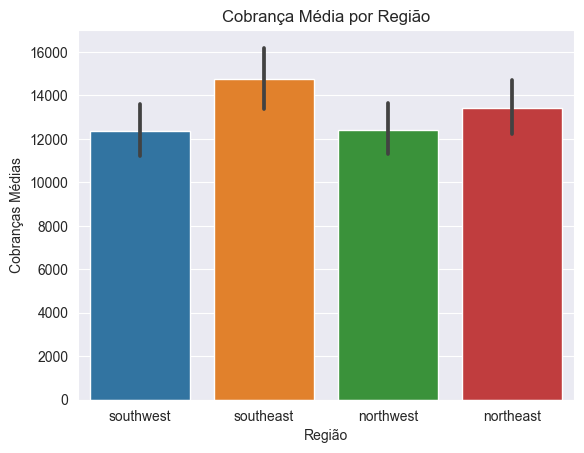

In [13]:
# Analisando a cobrança média por região 
sns.set_style("darkgrid")
plt.tight_layout()
sns.barplot(data = df_seguro, y ='cobrancas', x = 'regiao')

# Colocando legendas e mostrando
plt.title("Cobrança Média por Região")
plt.xlabel("Região")
plt.ylabel("Cobranças Médias")
plt.show()

* #### Os segurados da região sudeste tem as maiores despesas médias com os planos de seguro. A ordem ascendente de maiores cobranças médias por região pode ser um indicativo de que existe um grau de hierarquia entre essa variável e a variável target. 

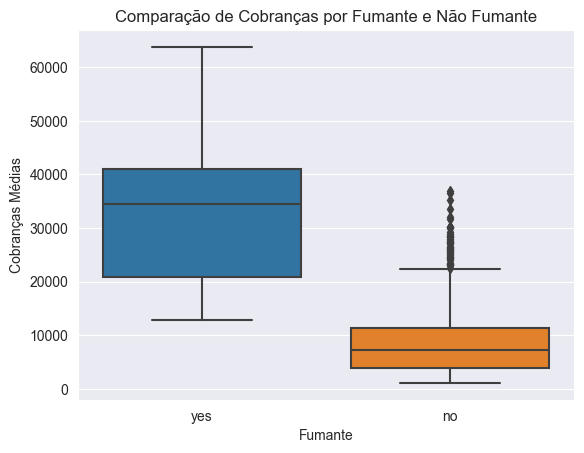

In [14]:
# Analisando a relação de fumante com cobranças
sns.set_style("darkgrid")
plt.tight_layout()
sns.boxplot(data = df_seguro, x = 'fumante', y = 'cobrancas')

# Colocando título e mostrando
plt.title("Comparação de Cobranças por Fumante e Não Fumante")
plt.xlabel("Fumante")
plt.ylabel("Cobranças Médias")
plt.show()

* #### Como é possível perceber, a variável *Fumante* destaca bem o nível de cobranças médias entre os dois grupos. Essa variável pode ser muito interessante para o modelo

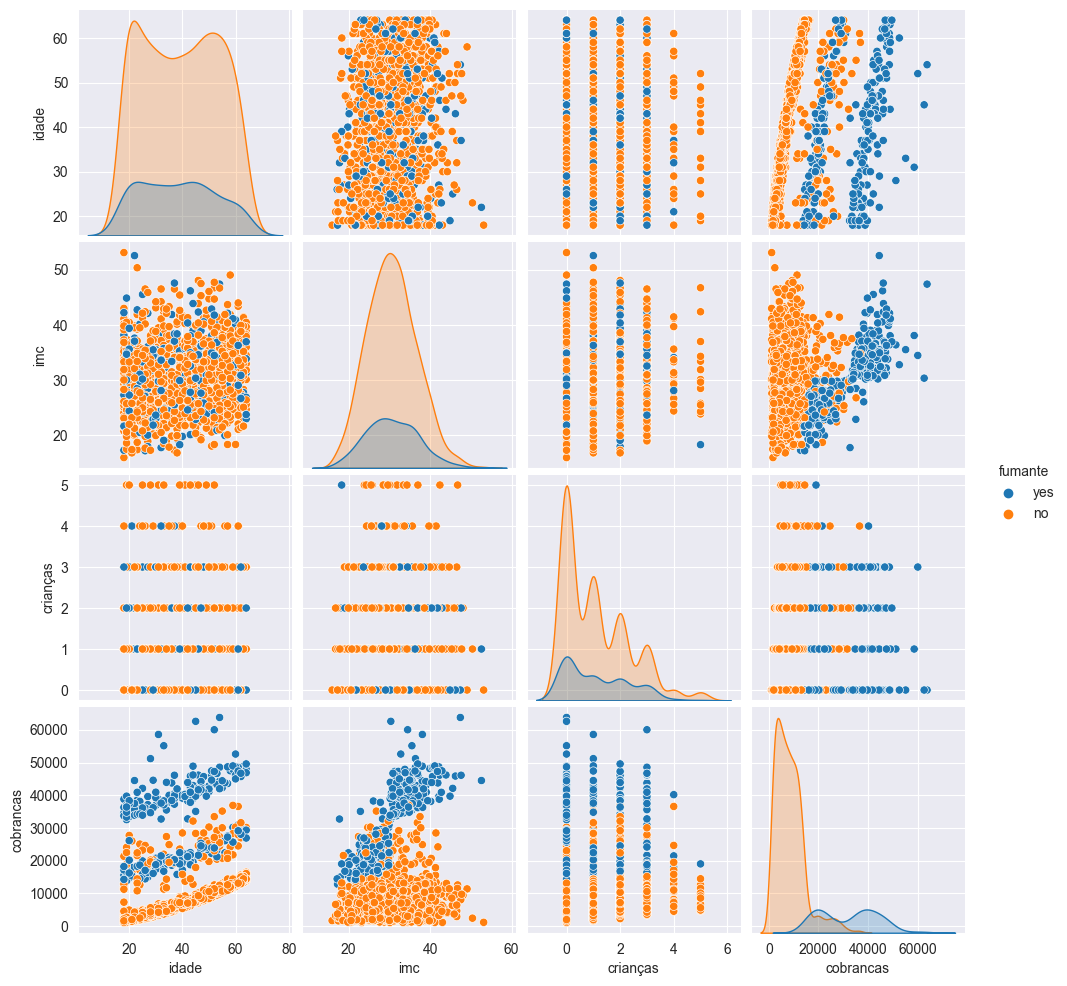

In [15]:
# Analisando mais correlações das features com a variával target
sns.pairplot(df_seguro, hue="fumante")
plt.show()

* #### É possível ver, na última linha do pairplot, que existe uma clara relação entre as idades e as cobranças anuais do plano de seguro, o que significa que a variável idade pode ser muito interessante para o modelo preditivo. Utilizando a divisão de grupos em fumante e não fumante, ainda é possível perceber que há nítida separação neste mesmo gráfico. No entanto, a relação direta persiste. 

## <a> Codificando Variáveis Categóricas </a>
As variáveis que precisam ser codificadas são:

* Fumante
* Sexo
* Região

In [16]:
# Criando cópia do DataFrame original para testes na etapa de Cross-Validation
df_seguro1 = df_seguro.copy()

# Como só temos variáveis categóricas nominais, é possível usar One Hot Encoder ou get dummies
# Para variáveis com baixa cardinalidade como fumante e sexo, podemos fazer um map

# Codificando variável sexo, criando variável 'homem' (homem = 1, mulher = 0)
df_seguro['homem'] = df_seguro['sexo'].map({'male':1, 'female':0})

# Codificando variável fumante
df_seguro['fumante'] = df_seguro['fumante'].map({'yes':1, 'no':0})

# Visualizando
df_seguro.head()

,idade,sexo,imc,crianças,fumante,regiao,cobrancas,homem
0,19,female,27.90,0,1,southwest,16884.92,0
1,18,male,33.77,1,0,southeast,1725.55,1
2,28,male,33.00,3,0,southeast,4449.46,1
3,33,male,22.70,0,0,northwest,21984.47,1
4,32,male,28.88,0,0,northwest,3866.86,1


In [17]:
# Dropando a antiga variável sexo, pois agora já está codificada
df_seguro = df_seguro.drop('sexo', axis = 1)

# Visualizando 
df_seguro.head()

,idade,imc,crianças,fumante,regiao,cobrancas,homem
0,19,27.90,0,1,southwest,16884.92,0
1,18,33.77,1,0,southeast,1725.55,1
2,28,33.00,3,0,southeast,4449.46,1
3,33,22.70,0,0,northwest,21984.47,1
4,32,28.88,0,0,northwest,3866.86,1


In [18]:
# Para codificar a variável região (que tem 4 classes), utilizaremos OHE, que pode ser feito pelo get_dummies
# Utiliza-se drop_first = True para eliminar uma das colunas (OHE gera n-1 colunas a partir de n colunas)
dummies_regiao = pd.get_dummies(df_seguro['regiao'], drop_first=True) 

# Transformando False e True em 0 e 1
dummies_regiao = dummies_regiao.astype(int)

# Visualizando
dummies_regiao.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [19]:
# Visualizando 5 primeiras linhas de como ficaria a concatenação com o DataFrame original
# Utiliza-se axis = 1 para juntar as colunas
pd.concat([df_seguro, dummies_regiao], axis = 1).head()

,idade,imc,crianças,fumante,regiao,cobrancas,homem,northwest,southeast,southwest
0,19,27.90,0,1,southwest,16884.92,0,0,0,1
1,18,33.77,1,0,southeast,1725.55,1,0,1,0
2,28,33.00,3,0,southeast,4449.46,1,0,1,0
3,33,22.70,0,0,northwest,21984.47,1,1,0,0
4,32,28.88,0,0,northwest,3866.86,1,1,0,0


In [20]:
# Atualizando o DataFrame original com a concatenação e visualizando
df_seguro = pd.concat([df_seguro, dummies_regiao], axis = 1)
df_seguro.head()

,idade,imc,crianças,fumante,regiao,cobrancas,homem,northwest,southeast,southwest
0,19,27.90,0,1,southwest,16884.92,0,0,0,1
1,18,33.77,1,0,southeast,1725.55,1,0,1,0
2,28,33.00,3,0,southeast,4449.46,1,0,1,0
3,33,22.70,0,0,northwest,21984.47,1,1,0,0
4,32,28.88,0,0,northwest,3866.86,1,1,0,0


In [21]:
# Dropando a coluna regiao, pois já está devidamente codificada
df_seguro = df_seguro.drop(['regiao'], axis = 1)

# Visualizando DataFrame com todas variáveis codificadas
df_seguro.head()

,idade,imc,crianças,fumante,cobrancas,homem,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,0,0,0,1
1,18,33.77,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.88,0,0,3866.86,1,1,0,0


## <a> Separando Variáveis Preditoras e Variável Target </a>

In [22]:
# Definindo as variáveis independentes
X = df_seguro.drop(['cobrancas'], axis = 1)

# Definindo a variável dependente
y = df_seguro[['cobrancas']]

In [23]:
# Visualizando as variáveis independentes (preditores)
X.head()

,idade,imc,crianças,fumante,homem,northwest,southeast,southwest
0,19,27.90,0,1,0,0,0,1
1,18,33.77,1,0,1,0,1,0
2,28,33.00,3,0,1,0,1,0
3,33,22.70,0,0,1,1,0,0
4,32,28.88,0,0,1,1,0,0


In [24]:
# Visualizando a variável dependente (target)
y.head()

,cobrancas
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


## <a> Separando as Bases </a>
Uma das principais etapas de qualquer projeto de *Machine Learning*, a separação de bases é necessária para que possamos realizar transformações nos dados, como, por exemplo, Feature Scaling. Dessa forma, tais transformações devem ser feitas sempre **após o *split* de bases**, previnindo nosso modelo de incorrer em *Data Leakage* e *Overfitting*.

In [25]:
# Importando separador de bases do sklearn
from sklearn.model_selection import train_test_split

In [26]:
# Separando as bases
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Olhando as dimensões de cada parte separada 
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((1070, 8), (268, 8), (1070, 1), (268, 1))

## <a> Feature Scaling </a>
Como um dos algoritmos utilizados representa um modelo linear, é necessário trazer as variáveis para mesma escala. 

In [27]:
# Criando cópias (sem scaling) para visualizar os resultados dessa metodologia
X_no_scaling = X.copy()
y_no_scaling = y.copy()

X_treino_no_scaling = X_treino.copy()
X_teste_no_scaling = X_teste.copy()
y_treino_no_scaling = y_treino.copy()
y_teste_no_scaling = y_teste.copy()

In [28]:
# Visualizando escala de variáveis
df_seguro.describe()

,idade,imc,crianças,fumante,cobrancas,homem,northwest,southeast,southwest
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,0.20,13270.42,0.51,0.24,0.27,0.24
std,14.05,6.10,1.21,0.40,12110.01,0.50,0.43,0.45,0.43
min,18.00,15.96,0.00,0.00,1121.87,0.00,0.00,0.00,0.00
25%,27.00,26.30,0.00,0.00,4740.29,0.00,0.00,0.00,0.00
50%,39.00,30.40,1.00,0.00,9382.03,1.00,0.00,0.00,0.00
75%,51.00,34.69,2.00,0.00,16639.91,1.00,0.00,1.00,0.00
max,64.00,53.13,5.00,1.00,63770.43,1.00,1.00,1.00,1.00


* #### Basta observar os valores mínimos e máximos das variáveis numéricas para notar a diferença de escala

In [29]:
# Normalização = MinMaxScaler, Padronização = StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Criando Scaler
scaler = MinMaxScaler()

In [30]:
# Visualizando tipo do Scaler
type(scaler)

sklearn.preprocessing._data.MinMaxScaler

* #### Precisamos fazer Scaling no treino e aplicá-lo, também, no teste. Dessa forma utilizamos '.fit_transform()' no treino e apenas '.transform()' no teste. 

* #### Isso significa que o Scaling será feito com base nos dados de treino (o fit é apenas no treino), e **NÃO** nos dados de teste (no teste é só o transform). Dessa forma, não incorremos em *Data Leakage* pois as informações do teste não serão conhecidas.

* #### Se utilizássemos o '.fit_transform()' na base toda (treino e teste), estaríamos incorrendo em Data Leakage. Dessa forma, '.fit_transform()' só é utilizado no treino e '.transform()' só é utilizado no teste.

* ### Sendo assim, temos:

In [31]:
# Definindo as colunas em que se deseja fazer o Scaling (Scaling é só nas variáveis preditoras)
colunas = X_treino.columns

# Fazendo o Scaling no treino e teste (fit só no treino, transform no treino e teste)
X_treino[colunas] = scaler.fit_transform(X_treino)
X_teste[colunas] = scaler.transform(X_teste)

X_treino.shape, X_teste.shape

((1070, 8), (268, 8))

#### Essa é a normalização que o MinMaxScaler calcula:

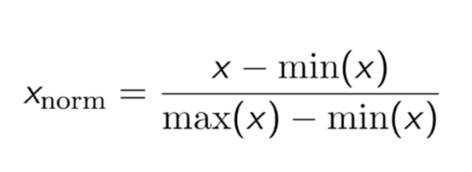

In [32]:
# Visualizando as mudanças feitas pelo MinMaxScaler
X_treino.describe()

,idade,imc,crianças,fumante,homem,northwest,southeast,southwest
count,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00
mean,0.46,0.39,0.22,0.21,0.51,0.24,0.26,0.25
std,0.31,0.16,0.24,0.40,0.50,0.43,0.44,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.28,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.47,0.38,0.20,0.00,1.00,0.00,0.00,0.00
75%,0.72,0.50,0.40,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [33]:
# Visualizando as mudanças feitas pelo MinMaxScaler
X_teste.describe()

,idade,imc,crianças,fumante,homem,northwest,southeast,southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.45,0.41,0.21,0.20,0.48,0.26,0.30,0.23
std,0.30,0.17,0.23,0.40,0.50,0.44,0.46,0.42
min,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.29,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.43,0.40,0.20,0.00,0.00,0.00,0.00,0.00
75%,0.70,0.52,0.40,0.00,1.00,1.00,1.00,0.00
max,1.00,0.99,1.00,1.00,1.00,1.00,1.00,1.00


* #### Todas as variáveis em X_treino estão compreendidas entre 0 e 1

* #### Todas as variáveis em X_teste foram transformadas com base no scaling feito em X_treino

## <a> Analisando a Correlação entre as Variáveis </a>
Esta etapa é necessária para verificar se há alguma colinearidade entre as variáveis preditoras. Caso isso ocorra, devemos subtrair uma delas, já que a multicolinearidade é um problema para um dos algoritmos que será utilizado (regressão linear).

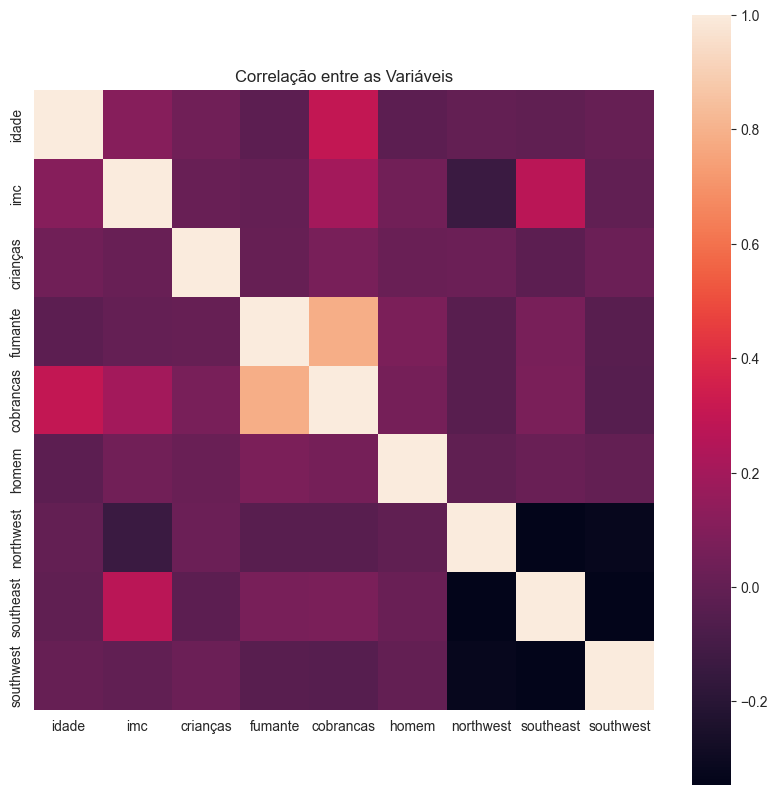

In [34]:
# Criando objetos para visualização 
figura, axes = plt.subplots(1,1, figsize=(10,10))
correlacao = df_seguro.corr()
sns.heatmap(correlacao, mask = np.zeros_like(correlacao, dtype = bool), square = True, ax = axes)

# Colocando título e mostrando 
plt.title("Correlação entre as Variáveis")
plt.show()

* #### Não foram identificados indícios de alta correlação entre os preditores.

## <a> Analisando se há Dados Faltantes </a>

In [35]:
# Utilizando os métodos 'isnull()' e 'sum()'
df_seguro.isnull().sum()

idade        0
imc          0
crianças     0
fumante      0
cobrancas    0
homem        0
northwest    0
southeast    0
southwest    0
dtype: int64

## <a> Machine Learning </a>

* #### O primeiro modelo que será utilizado é a regressão linear. Será utilizada a técnica de validação cruzada para não incorrer em overfitting. Além disso, a validação cruzada também auxiliará na comparação entre modelos.

In [36]:
# Importando LinearRegression do sklearn
from sklearn.linear_model import LinearRegression

# Importando cross_val_score
from sklearn.model_selection import cross_val_score

## <a> Regressão Linear </a>

#### <a> Cross-Validation: Competição de Modelos </a>

In [37]:
# Criando modelo
regressao_lin = LinearRegression()

# Criando função para calcular RMSE da Regressão Linear
def rmse_reg_lin(scaling):
    '''
    Calcula o Rooted Mean Squared Error Médio de 10 Folds utilizando Cross-Validation a partir da classe LinearRegression.

    Argumentos:

    scaling: Refere-se ao Scaling
    1 para utilização do Scaling nos dados de treino 
    0 para não utilização do Scaling nos dados de treino
    '''
    dados = [X_treino, y_treino, X_treino_no_scaling, y_treino_no_scaling]

    if scaling == 1:
        rmse = cross_val_score(estimator = regressao_lin, # Modelo Definido
                              X = dados[0], y = dados[1], # Dados de treino (COM SCALING)
                              cv = 10, # Número de Folds
                              scoring = 'neg_root_mean_squared_error') # Métrica
        rmse *= -1 # RMSE Positivo
        rmse_medio_10_folds = rmse.mean() # Média para os 10 RMSE
    
    elif scaling == 0:
        rmse = cross_val_score(estimator = regressao_lin, # Modelo Definido
                              X = dados[2], y = dados[3], # Dados de treino (SEM SCALING)
                              cv = 10, # Número de Folds
                              scoring = 'neg_root_mean_squared_error') # Métrica
        rmse *= -1 # RMSE Positivo
        rmse_medio_10_folds = rmse.mean() # Média para os 10 RMSE
        
    return rmse_medio_10_folds, rmse # Retornando o RMSE médio dos 10 Folds e os valores individuais pra cada Fold

In [38]:
print(f"O RMSE médio (10-fold) da Regressão Linear com utilização de Scaling foi: {rmse_reg_lin(1)[0]}")
print(f"O RMSE médio (10-fold) da Regressão Linear sem utilização de Scaling foi: {rmse_reg_lin(0)[0]}")

O RMSE médio (10-fold) da Regressão Linear com utilização de Scaling foi: 6133.083926205501
O RMSE médio (10-fold) da Regressão Linear sem utilização de Scaling foi: 6133.0839262055


#### *Os modelos com e sem Scaling obtiveram praticamente o mesmo desempenho.*

## <a> Árvore de Regressão </a>

#### <a> Cross-Validation: Competição de Modelos </a>

In [39]:
# Importando a classe DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [40]:
# Criando o modelo
arvore_reg = DecisionTreeRegressor(random_state=4)

# Criando função para calcular o RMSE da Árvore de Regressão
def rmse_arvore_regressao(scaling):
    '''
    Calcula o Rooted Mean Squared Error Médio de 10 Folds utilizando Cross-Validation a partir da classe DecisionTreeRegressor.

    Argumentos:

    scaling: Refere-se ao Scaling
    1 para utilização do Scaling nos dados de treino 
    0 para não utilização do Scaling nos dados de treino
    '''
    dados = [X_treino, y_treino, X_treino_no_scaling, y_treino_no_scaling]

    if scaling == 1:
        rmse = cross_val_score(estimator = arvore_reg, # Modelo Definido: Árvore de Regressão
                              X = dados[0], y = dados[1], # Dados de treino (COM SCALING)
                              cv = 10, # Número de Folds
                              scoring = 'neg_root_mean_squared_error') # Métrica
        rmse *= -1 # RMSE Positivo
        rmse_medio_10_folds = rmse.mean() # Média para os 10 RMSE
    
    elif scaling == 0:
        rmse = cross_val_score(estimator = arvore_reg, # Modelo Definido: Árvore de Regressão
                              X = dados[2], y = dados[3], # Dados de treino (SEM SCALING)
                              cv = 10, # Número de Folds
                              scoring = 'neg_root_mean_squared_error') # Métrica
        rmse *= -1 # RMSE Positivo
        rmse_medio_10_folds = rmse.mean() # Média para os 10 RMSE
        
    return rmse_medio_10_folds, rmse # Retornando o RMSE médio dos 10 Folds e os valores individuais pra cada Fold

In [41]:
print(f"O RMSE médio (10-fold) da Árvore de Regressão com utilização de Scaling foi: {rmse_arvore_regressao(1)[0]}")
print(f"O RMSE médio (10-fold) da Árvore de Regressão sem utilização de Scaling foi: {rmse_arvore_regressao(0)[0]}")

O RMSE médio (10-fold) da Árvore de Regressão com utilização de Scaling foi: 6590.2526488518515
O RMSE médio (10-fold) da Árvore de Regressão sem utilização de Scaling foi: 6624.495769471096


####  *O modelo com Scaling foi melhor*

### Já que as colunas de região não apresentaram fortes correlações com a variável target, iremos removê-las e testar o desempenho dos modelos sem elas utilizando Cross Validation:

###### Obs: Os desempenhos sem as variáveis de região serão comparados levando em conta os modelos em que o Scaling foi utilizado.

In [42]:
# Vendo quais são as colunas de X_treino
X_treino.columns

Index(['idade', 'imc', 'crianças', 'fumante', 'homem', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [43]:
# Selecionando as colunas que iremos remover (regiões)
colunas_de_regioes = [col for col in X_treino.columns if 'st' in col]
colunas_de_regioes

['northwest', 'southeast', 'southwest']

## <a> Regressão Linear sem Regiões </a>

In [44]:
# Criando função para calcular o RMSE da Regressão Linear (Sem regiões)
def reg_lin_sem_regiao():

        rmse = cross_val_score(estimator = regressao_lin, # Modelo Definido: Regressão Linear
                              X = X_treino.drop(colunas_de_regioes, axis = 1), y = y_treino, # Dados de treino (com Scaling e sem regiões)
                              cv = 10, # Número de Folds
                              scoring = 'neg_root_mean_squared_error') # Métrica
        rmse *= -1 # RMSE Positivo
        rmse_medio_10_folds = rmse.mean() # Média para os 10 RMSE
    

        return rmse_medio_10_folds, rmse # Retornando o RMSE médio dos 10 Folds e os valores individuais pra cada Fold

In [45]:
print(f"O RMSE médio (10-fold) da Regressão Linear com utilização de Scaling e sem as colunas de região foi: {reg_lin_sem_regiao()[0]}")

O RMSE médio (10-fold) da Regressão Linear com utilização de Scaling e sem as colunas de região foi: 6121.545062597131


#### O modelo teve uma leve melhora

## <a> Árvore de Regressão sem Regiões </a>

In [46]:
# Criando função para calcular o RMSE da Árvore de Regressão (Sem regiões)
def arvore_reg_sem_regiao():

        rmse = cross_val_score(estimator = arvore_reg, # Modelo Definido: Árvore de Regressão
                              X = X_treino.drop(colunas_de_regioes, axis = 1), y = y_treino, # Dados de treino (com Scaling e sem regiões)
                              cv = 10, # Número de Folds
                              scoring = 'neg_root_mean_squared_error') # Métrica
        rmse *= -1 # RMSE Positivo
        rmse_medio_10_folds = rmse.mean() # Média para os 10 RMSE
    

        return rmse_medio_10_folds, rmse # Retornando o RMSE médio dos 10 Folds e os valores individuais pra cada Fold

In [47]:
print(f"O RMSE médio (10-fold) da Árvore de Regressão com utilização de Scaling e sem as colunas de região foi: {arvore_reg_sem_regiao()[0]}")

O RMSE médio (10-fold) da Árvore de Regressão com utilização de Scaling e sem as colunas de região foi: 6887.55898668173


#### O modelo teve queda em seu desempenho

In [48]:
# Criando DataFrame com todos os resultados (6 modelos). Obs: Modelos sem features de região foram construídos COM SCALING
comparacao_rmse = pd.DataFrame({"Regressão Linear": rmse_reg_lin(1)[1], "Regressão Linear (sem Scaling)": rmse_reg_lin(0)[1], 
                     "Árvore de Regressão": rmse_arvore_regressao(1)[1], "Árvore de Regressão (sem Scaling)":rmse_arvore_regressao(0)[1], 
                     "Regressão Linear sem Regiões": reg_lin_sem_regiao()[1], 
                     "Árvore de Regressão sem Regiões":arvore_reg_sem_regiao()[1]})

# Visualizando 
comparacao_rmse.head()

,Regressão Linear,Regressão Linear (sem Scaling),Árvore de Regressão,Árvore de Regressão (sem Scaling),Regressão Linear sem Regiões,Árvore de Regressão sem Regiões
0,6074.00,6074.00,5970.12,5970.12,6047.75,6419.00
1,6580.87,6580.87,7406.58,7406.32,6576.17,6672.32
2,5233.83,5233.83,6580.15,6585.99,5208.18,6619.83
3,6045.25,6045.25,6596.72,6596.80,5969.10,6787.50
4,5836.46,5836.46,7049.75,7046.56,5870.20,6962.37


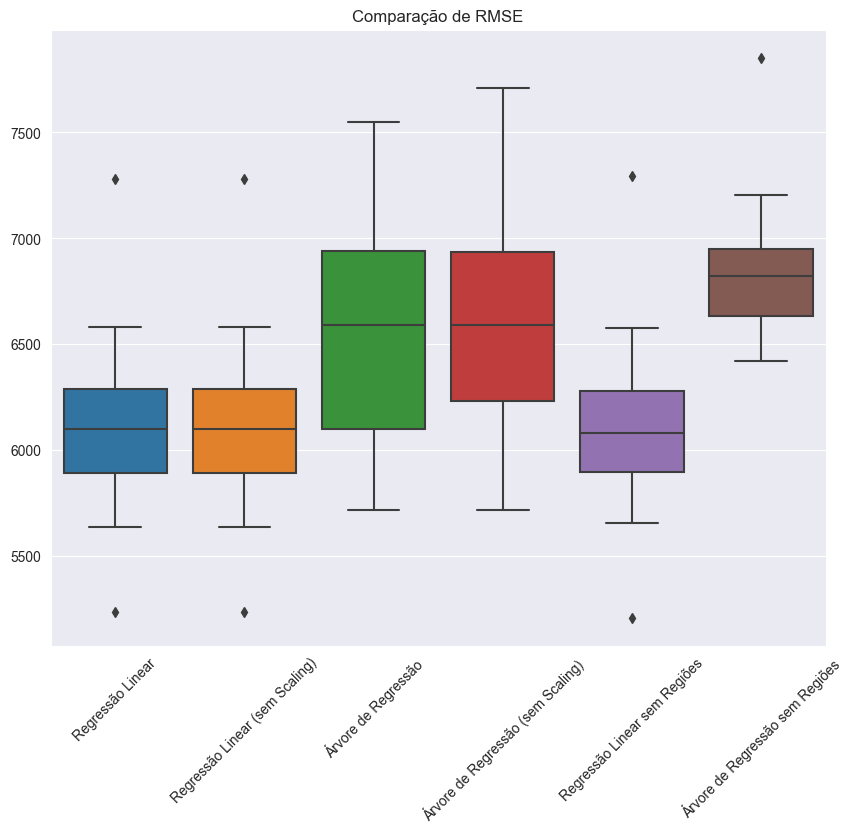

In [49]:
# Visualizando erros
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
plt.tight_layout()
sns.boxplot(data = comparacao_rmse).set_title("Comparação de RMSE")
plt.xticks(rotation=45)
plt.show()

Como é possível visualizar, ora pela mediana, ora pelos intervalos interquartílicos, os diferentes modelos utilizando o algoritmo de Regressão Linear obtiveram **melhor** desempenho se comparados aos modelos de Árvore de Regressão.

Uma possibilidade disso ter acontecido refere-se à natureza da **relação que os preditores têm com a variável target**. Esse ponto fica muito bem exemplificado no livro *"An Introduction to Statistical Learning"* em que, se tratando do **tradeoff viés x variância**, a obra explica que mesmo que modelos mais **flexíveis** (como uma Árvore de Regressão) possam reduzir o viés de forma substancial, torna-se difícil competir com um modelo linear **quando as variáveis (preditoras e target) se relacionam de forma linear**. Isso ocorre pois o viés será naturalmente pequeno caso utilize-se um modelo linear nessas condições.



*An Introduction to Statistical Learning, **página 44**.*

## <a> Modelo Campeão: Regressão Linear </a>

A partir do gráfico, bem como da comparação do RMSE médio (**dos 10 folds**), percebe-se que o modelo campeão foi a regressão linear sem regiões.

Nesse sentido, vamos utilizar toda a base de treino para ajustar ao modelo campeão:

In [50]:
# Ajustando o modelo (fit) com toda a base de treino (tirando as colunas de regiões)
regressao_lin.fit(X_treino.drop(colunas_de_regioes, axis = 1), y_treino)

LinearRegression()

In [51]:
# Visualizando os valores dos coeficientes
regressao_lin.coef_

array([[ 1.18251723e+04,  1.21744207e+04,  2.13627215e+03,
         2.36539033e+04, -7.95178837e+00]])

In [52]:
# Criando um DataFrame para visualizar as variáveis e seus respectivos coeficientes
df_coeficientes = pd.DataFrame(regressao_lin.coef_)
df_coeficientes.columns = regressao_lin.feature_names_in_
df_coeficientes

,idade,imc,crianças,fumante,homem
0,11825.17,12174.42,2136.27,23653.90,-7.95


### Diante dos coeficientes estimados, é necessário verificar se estes são estatisticamente significantes. Para isso, temos que:

1) Definir o teste estatístico: 
**Significância paramétrica**

2) Enunciar a hipótese nula e alternativa:

**H0: O parâmetro é igual a 0**

**H1: O parâmetro é diferente de 0**

3) Definir o nível de significância(α), 5% nesse caso

4) Cálcular a estatística de teste

5) Utilizar o p-valor para rejeitar/não rejeitar a hipótese nula

In [53]:
# Importando biblioteca statsmodels
import statsmodels.api as sm

In [54]:
# Estimando os coeficientes da regressão
regressao_linearsm = sm.OLS(y_treino,X_treino.drop(colunas_de_regioes, axis=1))

In [55]:
# Pegando os resultados da regressão 
resultado = regressao_linearsm.fit()

In [56]:
# Calculando p-valores de cada parâmetro e visualizando
p_values = resultado.summary2().tables[1]['P>|t|']
p_values

idade      0.00
imc        0.00
crianças   0.06
fumante    0.00
homem      0.24
Name: P>|t|, dtype: float64

#### A partir da escolha do nível de significância de 5%, é possível concluir que as features 'crianças' e 'homem' não são estatisticamente significativas, em razão do cálculo de seu p-valor ser maior do que o nível de significância definido previamente.

#### Apesar dos resultados provenientes da análise do p-valor, é possível continuar com as features em razão do problema aqui desenvolvido ser puramente preditivo, e não inferencial.

#### As demais features se mostraram estatisticamente significativas.

## <a> Teste Final </a>

Após ter selecionado o modelo campeão, é possível utilizá-lo na base de teste.

In [57]:
# Após ter ajustado o modelo (fit), faremos as previsões utilizando o X de teste
predicoes = regressao_lin.predict(X_teste.drop(colunas_de_regioes, axis = 1))

# Visualizando as 5 primeiras predicoes
predicoes[0:5]

array([[ 8554.81711589],
       [ 6973.58746745],
       [36798.60416104],
       [ 9417.88282303],
       [26871.68031081]])

In [58]:
# Visualizando os 5 primeiros valores reais do y_teste
y_teste.head()

,cobrancas
764,9095.07
887,5272.18
890,29330.98
1293,9301.89
259,33750.29


In [59]:
# Comparando o tamanho do vetor com as predições e o vetor com os valores reais
print(len(predicoes))
print(len(y_teste))

268
268


In [60]:
# Como os vetores tem a mesma dimensão (assim como o esperado), é possível fazer uma comparação de seus valores
previsao_x_real = pd.DataFrame({"Valores Reais":y_teste.values.flatten(), "Valor Predito": predicoes.flatten()})

# Criando coluna que mostra a diferença entre valores preditos e valores reais
previsao_x_real['Diferença Absoluta'] = abs(previsao_x_real['Valores Reais'] - previsao_x_real['Valor Predito'])

# Visualizndo as 15 primeiras linhas
previsao_x_real.head(15)

,Valores Reais,Valor Predito,Diferença Absoluta
0,9095.07,8554.82,540.25
1,5272.18,6973.59,1701.41
2,29330.98,36798.60,7467.62
3,9301.89,9417.88,115.99
4,33750.29,26871.68,6878.61
5,4536.26,11097.38,6561.12
6,2117.34,145.28,1972.06
7,14210.54,16746.17,2535.63
8,3732.63,747.53,2985.09
9,10264.44,11153.68,889.23


#### Para comparar o modelo com o resultado que seria obtido apenas utilizando uma simples média, é possível utilizar o r2

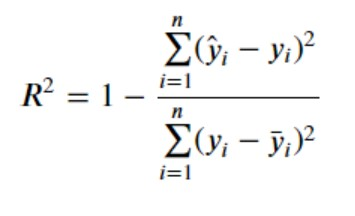

* O numerador representa o somatório dos desvios (entre valor predito e valor real)
* O denominador aponta o somatório dos desvios (entre valor médio e valor real)

In [61]:
# Importando a métrica
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
# Calculando r2
print(f"O Coeficiente de determinação (r2) foi: {(r2_score(y_true=y_teste, y_pred=predicoes))}")

# Calculando Erro Absoluto Médio 
print(f"O Erro Absoluto Médio (MAE) foi: {(mean_absolute_error(y_true=y_teste, y_pred=predicoes))}")

# Calculando a Raíz do Erro Quadrático Médio 
print(f"A Raíz do Erro Quadrático Médio (RMSE) foi: {(mean_squared_error(y_true=y_teste, y_pred=predicoes))**(1/2)}")

O Coeficiente de determinação (r2) foi: 0.7811302113434095
O Erro Absoluto Médio (MAE) foi: 4213.484797807139
A Raíz do Erro Quadrático Médio (RMSE) foi: 5829.17293025419


Caso a utilização de uma simples média aritmética para previsão gerasse resíduos iguais aos do modelo estimado, o valor do R2 seria 0. No entanto, foi obtido um valor de 0,78.

## <a> Utilizando Inputs para Previsão </a>

In [62]:
# Visualizando os valores referentes as colunas que são necessários para previsão
X_teste.drop(colunas_de_regioes, axis = 1).columns

Index(['idade', 'imc', 'crianças', 'fumante', 'homem'], dtype='object')

In [63]:
# Colocando inputs
idade = int(input("Insira a idade: "))

Insira a idade:  22


In [64]:
# Colocando inputs
imc = float(input("Insira o índice de massa corporal (IMC): "))

Insira o índice de massa corporal (IMC):  24.5


In [65]:
# Colocando inputs
crianças = int(input("Insira o número de crianças/dependentes: "))

Insira o número de crianças/dependentes:  0


In [66]:
# Colocando inputs
fumante = int(input("É fumante? 0 para não e 1 para sim: "))

É fumante? 0 para não e 1 para sim:  0


In [67]:
# Colocando inputs
sexo = int(input("Insira o sexo. 1 para homem e 0 para mulher: "))

Insira o sexo. 1 para homem e 0 para mulher:  1


In [68]:
# Vendo todos os inputs
idade, imc, crianças, fumante, sexo

(22, 24.5, 0, 0, 1)

In [69]:
# Completando o conjunto de features com 1,1,1 pois o X_treino original continha as variáveis de região e o scaler foi fitado lá
features = [[idade, imc, crianças, fumante, sexo, 1,1,1]]

# Transformando os valores com o Scaler que já está fitado
features = scaler.transform(features)
features

array([[0.08695652, 0.22975518, 0.        , 0.        , 1.        ,
        1.        , 1.        , 1.        ]])

In [70]:
# Descartando as features de região (modelo campeão foi fitado sem essas features)
features = features[:,:-3]
features

array([[0.08695652, 0.22975518, 0.        , 0.        , 1.        ]])

### Fazendo predição com base nestas features

In [71]:
regressao_lin.predict(features)

array([[1558.68521247]])

#### Indivíduo de 22 anos, 0 crianças, com IMC = 24,5, não fuma e do sexo masculino 
cobrancas = 1.558,68 dólares por ano

#### Indivíduo de 22 anos, 0 crianças, com IMC = 24,5, fumante e do sexo masculino 
cobrancas = 25.212,58 dólares por ano